In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Data source: "Google Stock Data 2024", https://www.kaggle.com/datasets/umerhaddii/google-stock-data-2024

In [401]:
df_google = pd.read_csv('/Users/jahansilverman/Documents/CSVs for Data Science Projects/GOOGL_2004-08-01_2024-12-18.csv', 
                        header=0)

In [402]:
df_google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044


In [403]:
df_google.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [404]:
df_google['Date'] = pd.to_datetime(df_google['Date'])

In [405]:
df_google.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [406]:
df_google.set_index('Date', inplace=True)
df_google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044


In [407]:
df_google['Price Change'] = df_google['Close'] - df_google['Open']
df_google.head()

,Open,High,Low,Close,Adj Close,Volume,Price Change
Date,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,0.008508
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,0.182682
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,-0.033784
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,-0.159410
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,0.026026


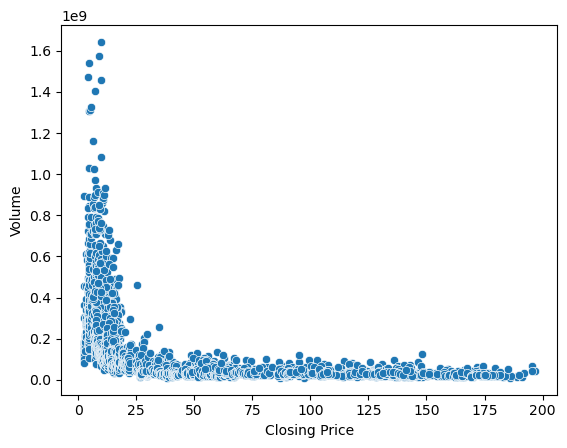

In [408]:
sns.scatterplot(data=df_google, x='Close', y='Volume')
plt.xlabel('Closing Price')
plt.show()

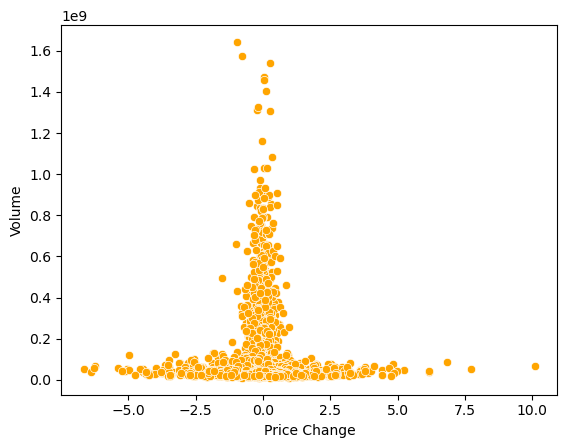

In [409]:
sns.scatterplot(data=df_google, x='Price Change', y='Volume', color='Orange')
plt.show()

In [410]:
df_google['ln(Volume)'] = np.log(df_google['Volume'])
df_google.head()

,Open,High,Low,Close,Adj Close,Volume,Price Change,ln(Volume)
Date,,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,0.008508,20.610301
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,0.182682,19.939508
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,-0.033784,19.715744
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,-0.159410,19.535648
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,0.026026,19.029207


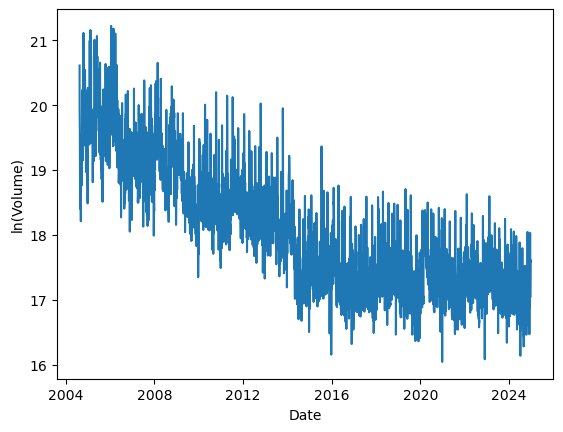

In [411]:
sns.lineplot(x='Date', y='ln(Volume)', data = df_google)
plt.show()

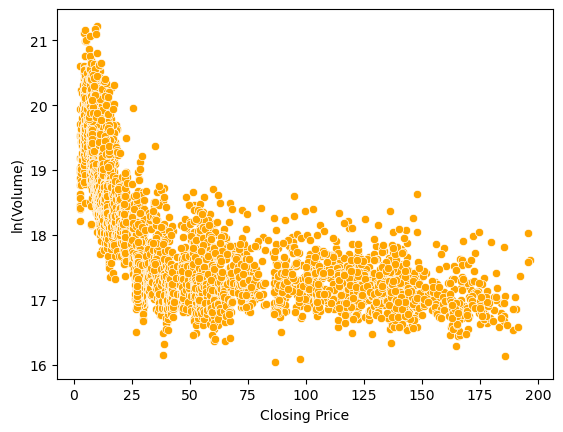

In [412]:
sns.scatterplot(x='Close', y='ln(Volume)', data = df_google, color = 'Orange')
plt.xlabel('Closing Price')
plt.show()

In [413]:
df_google['Price Change Direction'] = np.where(df_google['Price Change'] > 0, 'Price Increase', 
                                      np.where(df_google['Price Change'] < 0, 'Price Decrease', 'No Change'))
df_google.head()

,Open,High,Low,Close,Adj Close,Volume,Price Change,ln(Volume),Price Change Direction
Date,,,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,0.008508,20.610301,Price Increase
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,0.182682,19.939508,Price Increase
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,-0.033784,19.715744,Price Decrease
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,-0.159410,19.535648,Price Decrease
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,0.026026,19.029207,Price Increase


In [414]:
counts = df_google['Price Change Direction'].value_counts()
print(counts)

Price Increase    2583
Price Decrease    2526
No Change            9
Name: Price Change Direction, dtype: int64


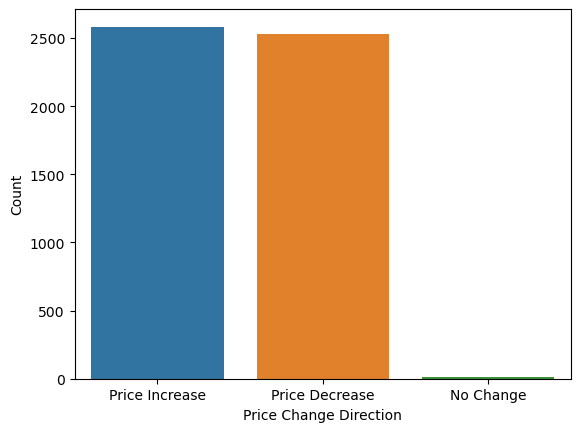

In [415]:
sns.countplot(data=df_google, x='Price Change Direction')
plt.ylabel('Count')
plt.show()

In [416]:
x = df_google[['Open', 'Close', 'High', 'Low']]
y = df_google['ln(Volume)']

In [417]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [418]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
print(x_train)

[[ 0.95732541  0.95916778  0.95177206  0.9642152 ]
 [-0.11135264 -0.10342011 -0.11109003 -0.10316254]
 [-0.528956   -0.52867299 -0.5319359  -0.52797962]
 ...
 [-0.722221   -0.72371682 -0.72221182 -0.72149009]
 [-0.44731395 -0.44219441 -0.44628777 -0.44267981]
 [-0.42228878 -0.42951579 -0.42807878 -0.4245213 ]]


In [419]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [420]:
coeff_df_google = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df_google

,Coefficient
Open,-0.022108
Close,-0.304093
High,14.712098
Low,-15.024490


In [421]:
y_pred = regressor.predict(x_test)

In [422]:
df_actual_vs_predicted_log_volume = pd.DataFrame({'Actual ln(Volume)': y_test, 'Predicted ln(Volume)': y_pred})
df_actual_vs_predicted_log_volume.head(10)

,Actual ln(Volume),Predicted ln(Volume)
Date,,
2004-10-19,19.707700,18.713742
2014-01-14,18.412696,18.334675
2011-12-23,17.877502,18.452403
2015-02-25,17.525075,18.364590
2009-08-24,18.400864,18.551460
2013-11-29,17.679693,18.251357
2022-04-25,17.646931,17.721962
2019-03-06,16.976842,17.712979
2015-11-25,16.977266,18.047427


In [423]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5540525082102558
Mean Squared Error: 0.463279384955559
Root Mean Squared Error: 0.680646299450426


In [424]:
r_squared = regressor.score(x_test, y_test)
print('Coefficient of Determination:', r_squared)

Coefficient of Determination: 0.5079561807428166


In [425]:
print('Intercept:', regressor.intercept_)

Intercept: 18.053042563650227
